# Modeling

### Imports

In [1]:
from bs4 import BeautifulSoup as bs
import requests
import re
import csv
import re
import imdb
ia = imdb.IMDb()
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
%matplotlib inline
from sklearn.model_selection import train_test_split
import json
import nltk

## Load and Split Data

In [2]:
df = pd.read_csv('movies_features.csv')


In [64]:
df.head()

,Unnamed: 0,domestic_total_gross,movie_title,producer,release_date,year,runtime_minutes,days_in_release,theaters,budget,...,Mystery,Biography,Sport,Music,History,War,Documentary,Western,Short,News
0,0,858373000,Avengers: Endgame,Walt Disney Studios,"Apr 26, 2019",2019,181.0,444,4662.0,356000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,543638043,The Lion King,Walt Disney Studios,"Jul 19, 2019",2019,118.0,360,4802.0,260000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,434038008,Toy Story 4,Walt Disney Studios,"Jun 21, 2019",2019,100.0,388,4575.0,200000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,477373578,Frozen II,Walt Disney Studios,"Nov 22, 2019",2019,103.0,234,4440.0,150000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,426829839,Captain Marvel,Walt Disney Studios,"Mar 8, 2019",2019,123.0,299,4310.0,160000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X1, y1 = df.drop(['Unnamed: 0','domestic_total_gross','movie_title','producer','release_date'], axis=1), df['domestic_total_gross']
X, X_test, y, y_test = train_test_split(X1, y1, test_size=.20, random_state=29)


### Scaling and Poly

In [5]:
p = PolynomialFeatures(degree=2)
X = p.fit_transform(X)
X_test = p.fit_transform(X_test)

In [7]:
std = StandardScaler()
std.fit(X)
std.fit(X_test)

std.transform(X_test)

array([[ 0.        , -0.60349696,  0.03343071, ..., -0.07161149,
         0.        , -0.05057217],
       [ 0.        , -0.60349696,  0.64932395, ..., -0.07161149,
         0.        , -0.05057217],
       [ 0.        ,  0.25519926, -0.44559736, ..., -0.07161149,
         0.        , -0.05057217],
       ...,
       [ 0.        ,  1.5432436 , -0.41138107, ..., -0.07161149,
         0.        , -0.05057217],
       [ 0.        ,  0.25519926, -0.24029962, ..., -0.07161149,
         0.        , -0.05057217],
       [ 0.        , -1.46219319, -0.6851114 , ..., -0.07161149,
         0.        , -0.05057217]])

In [8]:
std.transform(X)

array([[ 0.        , -0.60349696,  1.74424527, ..., -0.07161149,
         0.        , -0.05057217],
       [ 0.        ,  0.68454737,  0.40980991, ..., -0.07161149,
         0.        , -0.05057217],
       [ 0.        , -0.60349696, -0.10343445, ..., -0.07161149,
         0.        , -0.05057217],
       ...,
       [ 0.        ,  1.11389549, -3.7303613 , ..., -0.07161149,
         0.        , -0.05057217],
       [ 0.        ,  1.5432436 , -0.75354398, ..., -0.07161149,
         0.        , -0.05057217],
       [ 0.        , -0.60349696, -0.24029962, ..., -0.07161149,
         0.        , -0.05057217]])

## Initial Stats

In [9]:
model = sm.OLS(y,X)
results = model.fit()
results.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     domestic_total_gross   R-squared:                       0.746
Model:                              OLS   Adj. R-squared:                  0.737
Method:                   Least Squares   F-statistic:                     82.32
Date:                  Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                          00:34:41   Log-Likelihood:                -29733.
No. Observations:                  1567   AIC:                         5.958e+04
Df Residuals:                      1512   BIC:                         5.987e+04
Df Model:                            54                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -366.9646    383.059     -0.958      0.338   -1118.347     384.418
x1          2.515e+04    1.5e+04      1.674      0.094   -4327.803    5.46e+04
x2          2166.1619   1492.535      1.451      0.147    -761.497    5093.821
x3          6390.9057   4288.812      1.490      0.136   -2021.746    1.48e+04
x4          4959.6435   2282.215      2.173      0.030     483.002    9436.285
x5           129.1078     20.172      6.400      0.000      89.540     168.676
x6             4.4105      6.293      0.701      0.483      -7.933      16.753
x7            -1.2096      2.809     -0.431      0.667      -6.720       4.301
x8             4.5036      8.162      0.552      0.581     -11.506      20.513
x9            -3.9659      7.786     -0.509      0.611     -19.239      11.307
x10           -0.7898      9.778     -0.081      0.936     -19.970      18.390
x11           10.1420      3.751      2.704      0.007       2.785      17.499
x12           10.2530      5.164      1.986      0.047       0.124      20.382
x13           14.8380      7.663      1.936      0.053      -0.193      29.869
x14            2.2244      3.143      0.708      0.479      -3.940       8.389
x15           -1.8897      4.436     -0.426      0.670     -10.591       6.812
x16            3.3399      3.456      0.966      0.334      -3.439      10.118
x17            5.4509      3.427      1.591      0.112      -1.271      12.173
x18           -3.8139      3.145     -1.213      0.225      -9.983       2.355
x19           -0.4347      3.590     -0.121      0.904      -7.477       6.608
x20           -1.6050      3.181     -0.505      0.614      -7.844       4.634
x21           -0.0786      4.632     -0.017      0.986      -9.165       9.007
x22           -0.7840      3.442     -0.228      0.820      -7.536       5.968
x23            4.8494      3.057      1.586      0.113      -1.148      10.847
x24            0.8081      2.766      0.292      0.770      -4.618       6.235
x25            0.8155      3.550      0.230      0.818      -6.149       7.780
x26          -10.3919      3.008     -3.455      0.001     -16.292      -4.492
x27           21.1104      9.965      2.119      0.034       1.564      40.657
x28           -4.4500      3.481     -1.278      0.201     -11.278       2.378
x29            5.0431      5.236      0.963      0.336      -5.227      15.313
x30            0.4355      4.330      0.101      0.920      -8.058       8.930
x31            4.8930      4.253      1.150      0.250      -3.450      13.236
x32            3.5400      4.749      0.745      0.456      -5.775      12.855
x33           -3.4359      3.736     -0.920      0.358     -10.764       3.892
x34            2.1295      3.843      0.554      0.580      -5.408       9.667
x35            1.4923      3.076      0.485      0.628     

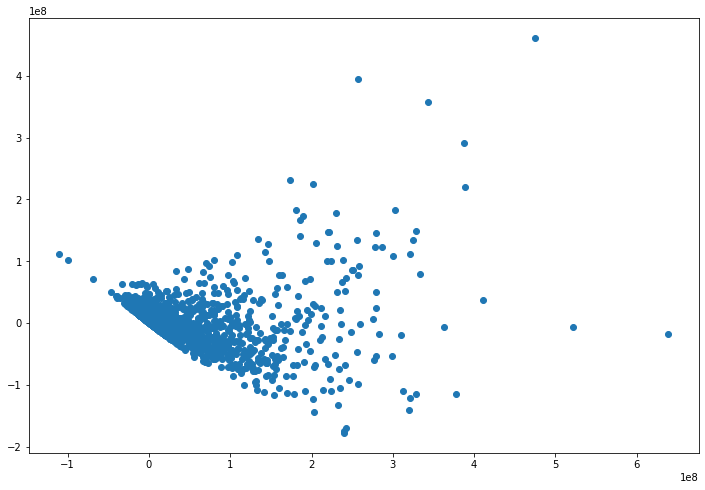

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(results.predict(), results.resid)

## Validation

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.20, random_state=43)

### Lin Reg

In [12]:
lr = LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_train,y_train)

0.7628308466000595

In [13]:
lr.score(X_val,y_val)

0.5469329833476915

In [14]:
lr.intercept_

-669330363.1918361

In [15]:
lr.coef_

array([-1.38450273e+05,  6.39256222e+05,  4.73283695e+02, ...,
        1.60923904e+00,  0.00000000e+00,  3.37935194e+00])

### Ridge Reg

In [16]:
clf = Ridge(alpha= 3,fit_intercept=True,normalize=True)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.6421856027629438

In [17]:
clf.score(X_val, y_val)

0.48877176477636985

## Putting it Together

In [18]:
lasso_model = Lasso(alpha = 50000, normalize=True)
lasso_model.fit(X_train,y_train)
lasso_model.score(X_train,y_train)

0.7086040504496269

In [19]:
lasso_model.score(X_val,y_val)

0.5204916862370508

In [20]:
lasso_model.coef_

array([ 0., -0.,  0., ...,  0.,  0.,  0.])

In [21]:
for feature, coef in zip(X1.columns, lasso_model.coef_):
        print(feature, ':', f'{coef:.2f}')

year : 0.00
runtime_minutes : -0.00
days_in_release : 0.00
theaters : 272.76
budget : -0.00
black_list : -0.00
big_six_producer : -0.00
rating_G : -0.00
rating_NC-17 : 0.00
rating_Not Rated : 0.00
rating_PG : 0.00
rating_PG-13 : -0.00
rating_R : -0.00
month_Aug : 0.00
month_Dec : -0.00
month_Feb : -0.00
month_Jan : 0.00
month_Jul : -0.00
month_Jun : 0.00
month_Mar : 0.00
month_May : 0.00
month_Nov : 0.00
month_Oct : 0.00
month_Sep : 0.00
Action : -0.00
Adventure : -0.00
Drama : -0.00
Sci-Fi : 0.00
Animation : 0.00
Family : -0.00
Musical : -0.00
Comedy : -0.00
Fantasy : -0.00
Romance : -0.00
Crime : 0.00
Thriller : -0.00
Horror : -0.00
Mystery : -0.00
Biography : -0.00
Sport : 0.00
Music : -0.00
History : 0.00
War : -0.00
Documentary : 0.00
Western : 0.00
Short : 0.00
News : 0.00


In [22]:
lasso_model.fit(X,y)
lasso_model.score(X,y)

0.6691641940351869

In [23]:
clf.fit(X,y)
clf.score(X,y)

0.6170085706561164

## Test

In [24]:

lasso_model.score(X_test,y_test)

0.698065834290341

In [25]:
clf.score(X_test,y_test)

0.6202930828043001

In [26]:
for feature, coef in zip(X1.columns, clf.coef_):
        print(feature, ':', f'{coef:.2f}')

year : 0.00
runtime_minutes : -45547.27
days_in_release : 13415.83
theaters : 1599.14
budget : 1884.60
black_list : 0.03
big_six_producer : -165186.70
rating_G : 1538125.34
rating_NC-17 : 496755.65
rating_Not Rated : 16948.18
rating_PG : -457161.52
rating_PG-13 : -55418.85
rating_R : 593406.44
month_Aug : 4305.19
month_Dec : -233165.60
month_Feb : 426980.72
month_Jan : -107864.90
month_Jul : -712351.48
month_Jun : 397109.90
month_Mar : 742053.84
month_May : -134900.25
month_Nov : 118905.15
month_Oct : 320635.96
month_Sep : -405274.85
Action : -367208.32
Adventure : 77502.01
Drama : 1258428.40
Sci-Fi : -640111.58
Animation : 1641724.63
Family : 449821.82
Musical : 21351.28
Comedy : -405985.52
Fantasy : -179906.03
Romance : -469236.20
Crime : -337235.63
Thriller : -130400.03
Horror : -309296.20
Mystery : -38033.99
Biography : -266324.92
Sport : -67401.69
Music : -667192.94
History : -348176.04
War : -392489.34
Documentary : -37472.47
Western : -373128.26
Short : -174332.46
News : -411490

In [57]:
prediction = clf.predict(X_test)

In [58]:
prediction = prediction.tolist()

In [59]:
prediction

[4164359.976724848,
 59432577.12963155,
 9518385.957321957,
 118172324.86475803,
 52504292.32005924,
 36002531.35516916,
 11884611.265892163,
 1722235.570394367,
 252198627.64164466,
 41549763.766899616,
 10714914.172523424,
 62976922.02324024,
 -579564.7554055154,
 5788849.522748247,
 3531625.688079819,
 73619042.94235463,
 32420238.420759022,
 1619849.5144520402,
 23967882.970303014,
 14240190.759176835,
 -8873498.814642817,
 49795805.710071474,
 6994001.053665221,
 17270453.599930674,
 39568605.701945186,
 125698341.8601072,
 144780374.62811095,
 182787710.72163227,
 -154669.07298377156,
 113658754.03033909,
 63385410.71714312,
 71688321.3516632,
 7392730.003878772,
 61345677.47377767,
 -1692005.6686062217,
 35908894.500719056,
 132752875.95241822,
 7256031.412427872,
 41923451.44255027,
 17619714.39596033,
 45953693.03379464,
 184979129.47910067,
 655468.5279434025,
 84372980.52955882,
 17594790.027724132,
 39519862.92059234,
 41406582.51584065,
 132602.0089008212,
 44844195.955894

In [60]:
y_test

1363    14019924
1055    52076908
890      9669521
541     86089513
413      6115825
          ...   
948      2394386
137      9198356
272       817339
830     35593113
1880     3325038
Name: domestic_total_gross, Length: 392, dtype: int64

In [65]:
df.iloc[890]

Unnamed: 0                            890
domestic_total_gross              9669521
movie_title             The Perfect Match
producer                        Lionsgate
release_date                 Mar 11, 2016
year                                 2016
runtime_minutes                        96
days_in_release                       296
theaters                              925
budget                                  0
black_list                              0
big_six_producer                        0
rating_G                                0
rating_NC-17                            0
rating_Not Rated                        0
rating_PG                               0
rating_PG-13                            0
rating_R                                1
month_Aug                               0
month_Dec                               0
month_Feb                               0
month_Jan                               0
month_Jul                               0
month_Jun                         